In [48]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import pickle
import pandas as pd
import random
import cv2

Using TensorFlow backend.


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    valid_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

(932, 1243)

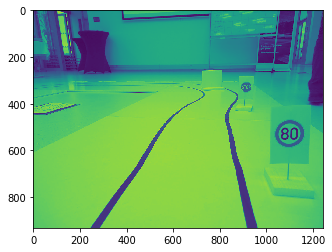

In [49]:
# img = cv2.imread('IMG_20191121_125403.jpg', 0)
# plt.imshow(img)
# img.shape

(150, 200, 3)


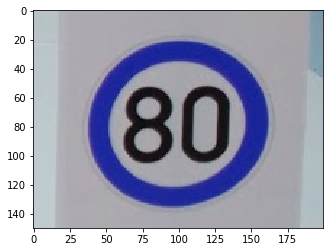

In [44]:
# # img_crop = img[450:600, 1000:1200, :]
# img_crop = img[500:510, , :]
# print(img_crop.shape)
# plt.imshow(img_crop)

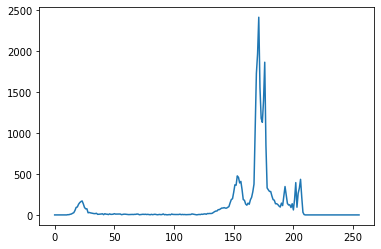

In [47]:
hist,bins = np.histogram(img_crop[:,:,2].ravel(),256,[0,256])
plt.plot(hist)

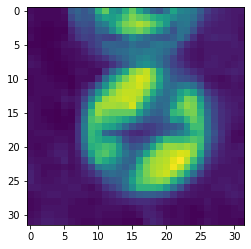

In [15]:
plt.imshow(X_red[0,:,:])

In [4]:
clss = [5, 14, 100]
X_tr, y_tr = train_data['features'], train_data['labels']
X_val, y_val = valid_data['features'], valid_data['labels']
X_t, y_t = test_data['features'], test_data['labels']

X_tr = np.concatenate((X_tr, X_t))
y_tr = np.concatenate((y_tr, y_t))
print(y_tr.shape)
print(X_tr.shape)

(47429,)
(47429, 32, 32, 3)


In [5]:
X_bckk = np.load("background_imgs.npy")
print(X_bckk.shape)

X_val = np.concatenate((X_val, X_bckk[:X_bckk.shape[0]//10,:,:]))
y_val = np.concatenate((y_val, np.zeros(X_bckk.shape[0]//10, dtype=np.uint8) + 100))
X_tr = np.concatenate((X_tr, X_bckk[X_bckk.shape[0]//10:,:,:]))
y_tr = np.concatenate((y_tr, np.zeros(X_bckk.shape[0] - X_bckk.shape[0]//10, dtype=np.uint8) + 100))

(11568, 32, 32, 3)


In [6]:
print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(57841, 32, 32, 3) (57841,)
(5566, 32, 32, 3) (5566,)


In [7]:
import collections, numpy

a = numpy.array(y_tr)
c = collections.Counter(a)
n = 0
for cc in clss:
  if cc == 35:
    n += c[cc]
  else:
    n += c[cc]
print(n)

X_train = np.zeros((n, 32, 32, 3), dtype=np.uint8)
y_train = np.zeros(n)
j = 0
for (i,x) in enumerate(X_tr):
  if y_tr[i] in clss:
    # if y_tr[i] == 35:
    #   y_train[j] = clss.index(y_tr[i])
    #   y_train[j+1] = clss.index(y_tr[i])+1
    #   X_train[j, :, :, :] = np.rot90(x)
    #   X_train[j+1, :, :, :] = np.rot90(x, k=3)
    #   j += 2
    # else:
    X_train[j, :, :, :] = x
    y_train[j] = clss.index(y_tr[i])
    j += 1
    

a = numpy.array(y_val)
c = collections.Counter(a)
n = 0
for cc in clss:
  if cc == 35:
    n += c[cc]
  else:
    n += c[cc]
print(n)

X_valid = np.zeros((n, 32, 32, 3), dtype=np.uint8)
y_valid = np.zeros(n)
j = 0
for (i,x) in enumerate(X_val):
  if y_val[i] in clss:
    # if y_val[i] == 35:
    #   y_val[j] = clss.index(y_val[i])
    #   y_val[j+1] = clss.index(y_val[i])+1
    #   X_valid[j, :, :, :] = np.rot90(x)
    #   X_valid[j+1, :, :, :] = np.rot90(x, k=3)
    #   j += 2
    # else:
    X_valid[j, :, :, :] = x
    y_valid[j] = clss.index(y_val[i])
    j += 1

13652
1456


In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data = data.loc[[5,14],:].reset_index(drop=True)
data = data.append({'ClassId' : 2 , 'SignName' : 'noise'} , ignore_index=True)
data = data.assign(ClassId=list(range(3)))
data.head()

,ClassId,SignName
0,0,Speed limit (80km/h)
1,1,Stop
2,2,noise


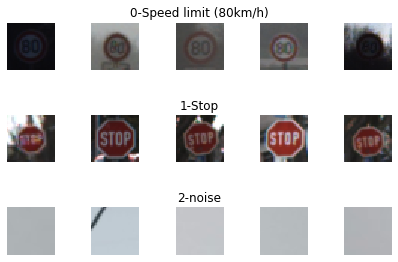

In [9]:
num_of_samples = []
 
cols = 5
num_classes = len(data)
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols)
fig.tight_layout()
for i in range(cols):
    for k, (j, row) in enumerate(data.iterrows()):
        x_selected = X_train[y_train == j]
        axs[k][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[k][i].axis("off")
        if i == 2:
            axs[k][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[2280, 960, 10412]


Text(0, 0.5, 'Number of images')

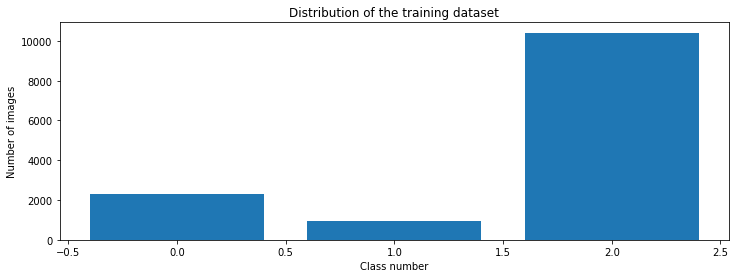

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
import cv2

(32, 32, 3)
0.0


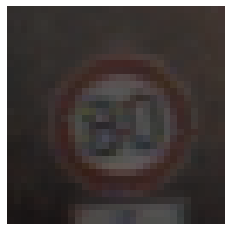

In [11]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    # only grayscale
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img

(32, 32)


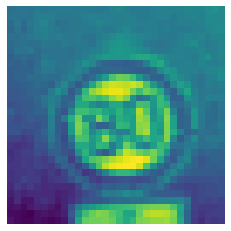

In [13]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


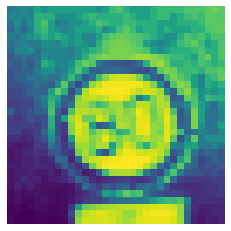

In [14]:
img = equalize(grayscale(X_train[1000]))
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))
X_valid = np.array(list(map(preprocessing, X_valid)))
# X_test = np.array(list(map(preprocessing, X_test)))

(13652, 32, 32)


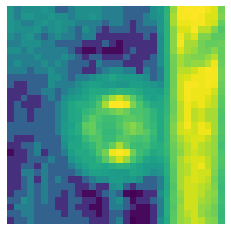

In [16]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 32, 32, 1)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(width_shift_range = 0.1, 
                   height_shift_range = 0.1,
                   zoom_range = 0.2,
                   shear_range = 0.1,
                   rotation_range = 10)

dataGen.fit(X_train)

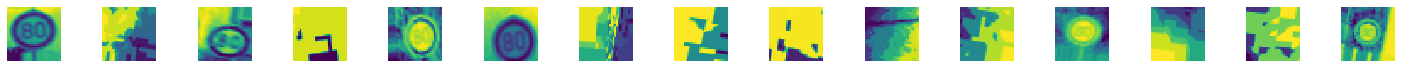

In [19]:
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1,15, figsize=(20,5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')

In [0]:
n_lab = len(np.unique(y_train))

In [21]:
n_lab

3

In [0]:
y_train = to_categorical(y_train, n_lab)
y_valid = to_categorical(y_valid, n_lab)
# y_test = to_categorical(y_test, n_lab)

In [0]:
def modified_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5),input_shape=(32, 32, 1), activation='relu')) #upgrade 30 -> 60
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30, (3,3), activation='relu')) #upgrade 15 -> 30
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(lr = .001 ), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [28]:
model2 = modified_model()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 480)              

In [29]:
model2.fit_generator(dataGen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=5, validation_data=(X_valid, y_valid), shuffle=True)

Epoch 1/5
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0724 - acc: 0.9752 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 2/5
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0149 - acc: 0.9957 - val_loss: 5.8108e-04 - val_acc: 1.0000
Epoch 3/5
2000/2000 [==============================] - 33s 17ms/step - loss: 0.0091 - acc: 0.9975 - val_loss: 0.0018 - val_acc: 0.9993
Epoch 4/5
2000/2000 [==============================] - 33s 17ms/step - loss: 0.0079 - acc: 0.9979 - val_loss: 0.0072 - val_acc: 0.9966
Epoch 5/5
2000/2000 [==============================] - 33s 16ms/step - loss: 0.0062 - acc: 0.9982 - val_loss: 4.8569e-04 - val_acc: 1.0000


In [0]:
score = model2.evaluate(X_test, y_test, verbose=False)

print(f'Test score: {score[0]}, Test accuracy: {score[1]}')

Test score: 0.02689714655681766, Test accuracy: 0.9964285714285714


In [0]:
from keras.models import load_model
model2.save('model.h5')  # creates a HDF5 file

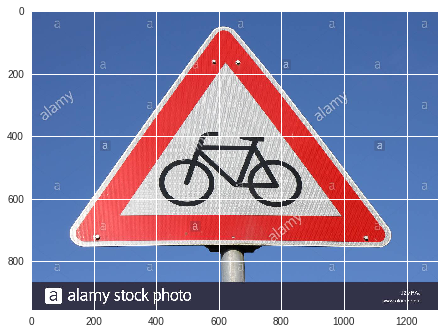

In [0]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
"""
https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg
https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg
https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg
https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg
https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg
"""

    
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 

(32, 32)


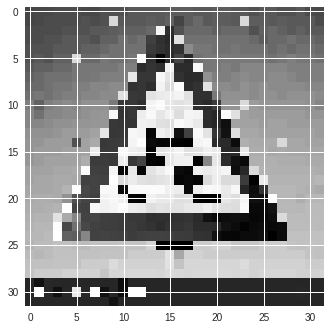

In [0]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 


In [0]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model2.predict_classes(img)))

predicted sign: [29]


In [0]:
model2.save_weights('TraficSigns_modified.h5')

In [0]:
from google.colab import files
files.download('TraficSigns_modified.h5')